In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
consumption_df = pd.read_csv('energy_consumption.date.csv')
weather_df = pd.read_csv('weather_seperated (2).csv')

In [43]:
print(consumption_df.columns)
print(weather_df.columns)

Index(['hour', 'day', 'month', 'year', 'Consumption_kWh'], dtype='object')
Index(['hour', 'day', 'month', 'year', 'temperature(°C)', 'humidity(%)',
       'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)'],
      dtype='object')


In [47]:
df = pd.merge(consumption_df, weather_df, 
                       on=['hour', 'day', 'month', 'year'], 
                       how='inner')


In [48]:
df

,hour,day,month,year,Consumption_kWh,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irrediance(W/m²)
0,0,9,7,2023,6.871123,21.6,69,21,20.8,0.0
1,1,9,7,2023,6.712378,21.4,66,30,22.0,0.0
2,2,9,7,2023,6.908867,21.2,67,33,22.0,0.0
3,3,9,7,2023,7.127702,20.4,62,49,21.9,0.0
4,4,9,7,2023,6.688406,20.3,62,100,19.7,0.0
...,...,...,...,...,...,...,...,...,...,...
8780,20,8,7,2024,6.063277,25.7,80,0,22.4,35.3
8781,21,8,7,2024,6.485928,24.8,84,0,20.0,0.0
8782,22,8,7,2024,6.542832,24.3,83,0,18.7,0.0
8783,23,8,7,2024,5.955779,23.7,87,0,18.8,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour              8785 non-null   int64  
 1   day               8785 non-null   int64  
 2   month             8785 non-null   int64  
 3   year              8785 non-null   int64  
 4   Consumption_kWh   8785 non-null   float64
 5   temperature(°C)   8785 non-null   float64
 6   humidity(%)       8785 non-null   int64  
 7   cloudcover(%)     8785 non-null   int64  
 8   windspeed(km/h)   8785 non-null   float64
 9   irrediance(W/m²)  8785 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 686.5 KB


In [51]:
print(df.isnull().sum())

hour                0
day                 0
month               0
year                0
Consumption_kWh     0
temperature(°C)     0
humidity(%)         0
cloudcover(%)       0
windspeed(km/h)     0
irrediance(W/m²)    0
dtype: int64


In [55]:
correlation_matrix = df.corr()

In [56]:
filtered_correlation_matrix = correlation_matrix.drop(columns=['hour', 'day', 'month', 'year'], errors='ignore')
filtered_correlation_matrix = filtered_correlation_matrix.drop(index=['hour', 'day', 'month', 'year'], errors='ignore')

In [58]:
Consumption_energy_correlations = filtered_correlation_matrix['Consumption_kWh'].sort_values(ascending=False)
Consumption_energy_correlations

Consumption_kWh     1.000000
humidity(%)         0.177143
cloudcover(%)       0.107914
irrediance(W/m²)    0.054050
windspeed(km/h)    -0.174406
temperature(°C)    -0.439827
Name: Consumption_kWh, dtype: float64

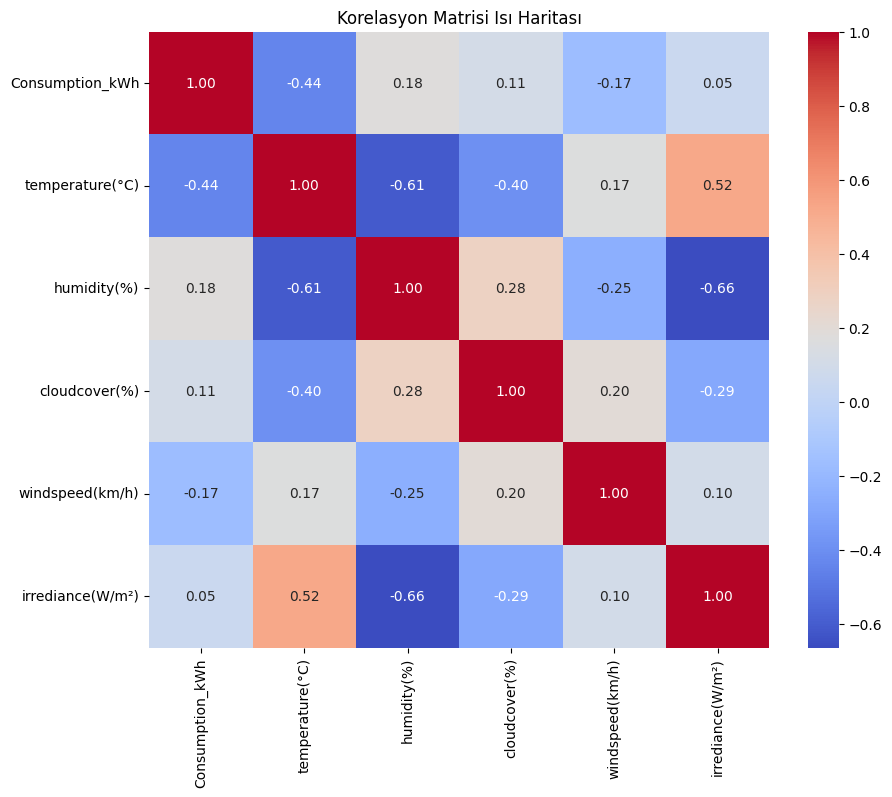

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()

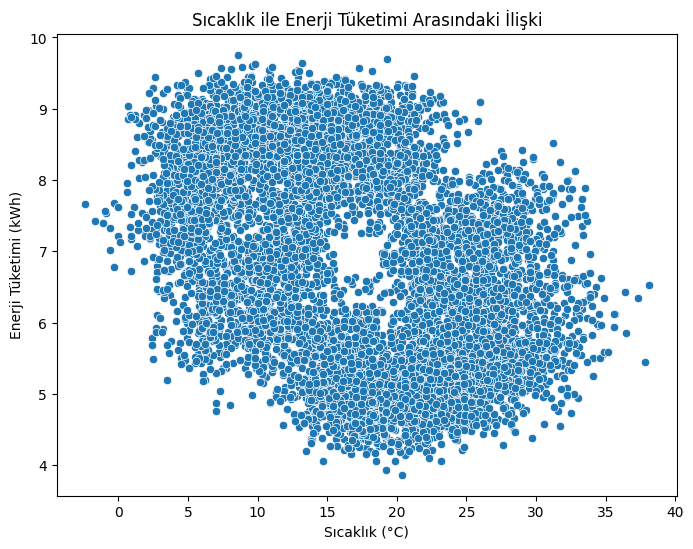

In [62]:
# Temperature ve Consumption_kWh arasındaki ilişkiyi gösteren dağılım grafiği
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature(°C)', y='Consumption_kWh', data=df)
plt.title('Sıcaklık ile Enerji Tüketimi Arasındaki İlişki')
plt.xlabel('Sıcaklık (°C)')
plt.ylabel('Enerji Tüketimi (kWh)')
plt.show()

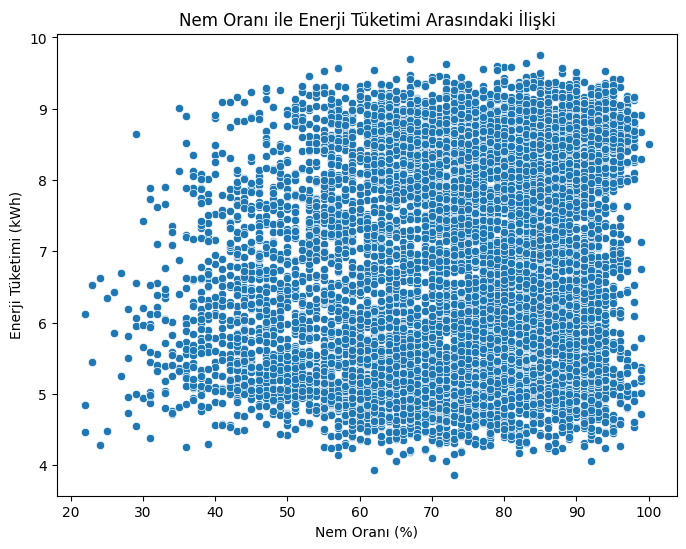

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='humidity(%)', y='Consumption_kWh', data=df)
plt.title('Nem Oranı ile Enerji Tüketimi Arasındaki İlişki')
plt.xlabel('Nem Oranı (%)')
plt.ylabel('Enerji Tüketimi (kWh)')
plt.show()

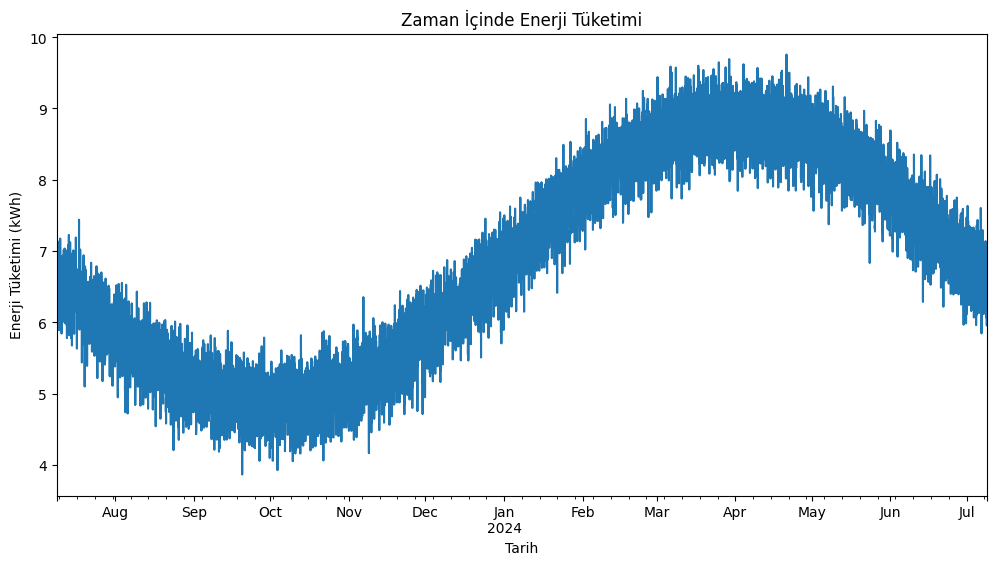

In [64]:
# Veriyi saat bazında gruplandırarak zaman serisi grafiği oluşturun
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.set_index('datetime')

plt.figure(figsize=(12, 6))
df['Consumption_kWh'].plot(title='Zaman İçinde Enerji Tüketimi')
plt.xlabel('Tarih')
plt.ylabel('Enerji Tüketimi (kWh)')
plt.show()

C:\Users\EOS\AppData\Local\Temp\ipykernel_5428\620562232.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Consumption_kWh'].resample('M').mean()


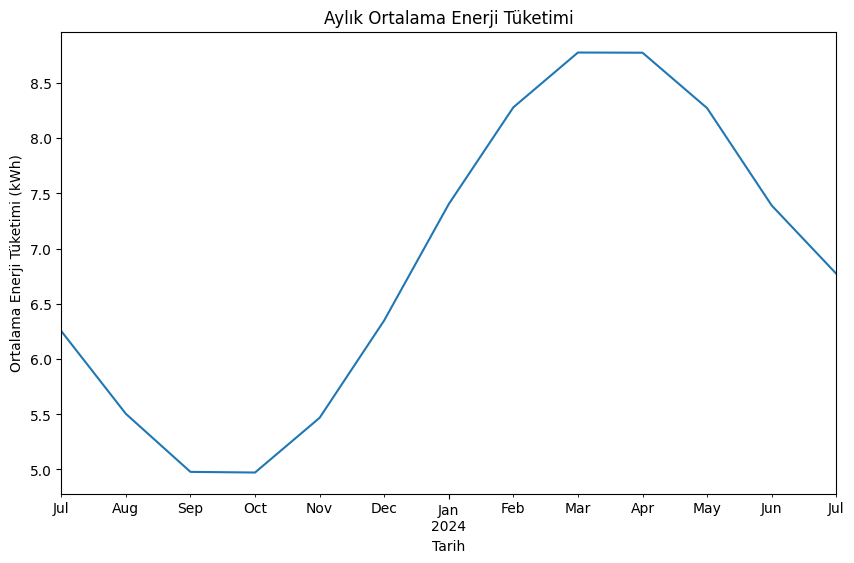

In [65]:
# Aylık ortalama enerji tüketimi
monthly_avg = df['Consumption_kWh'].resample('M').mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(title='Aylık Ortalama Enerji Tüketimi')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Enerji Tüketimi (kWh)')
plt.show()

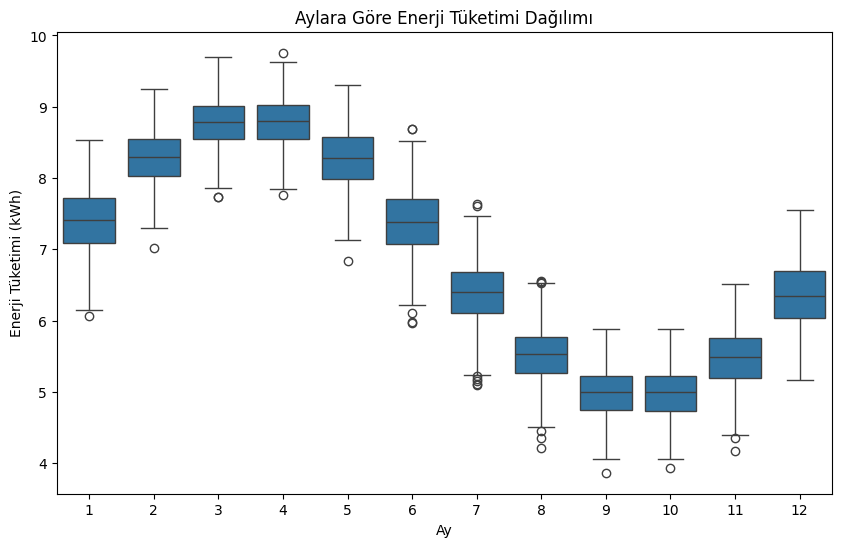

In [68]:
# Aylara göre enerji tüketimi dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Consumption_kWh', data=df)
plt.title('Aylara Göre Enerji Tüketimi Dağılımı')
plt.xlabel('Ay')
plt.ylabel('Enerji Tüketimi (kWh)')
plt.show()

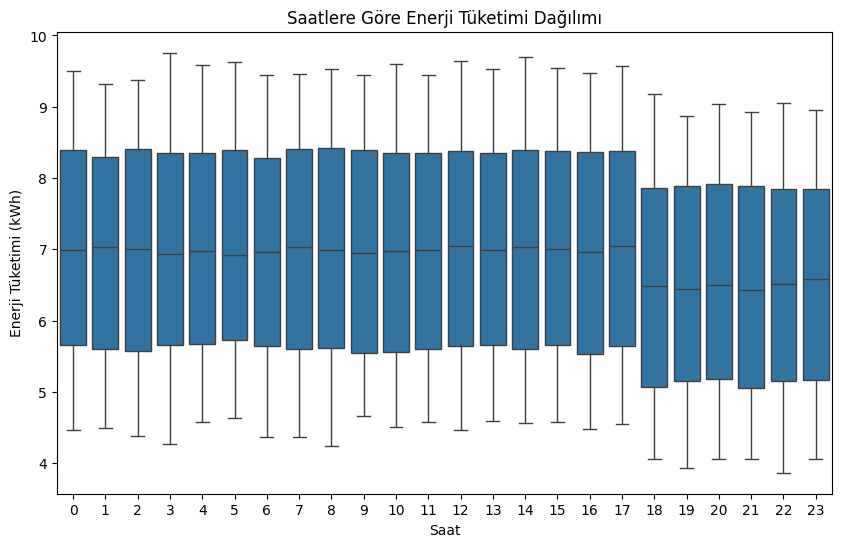

In [69]:
# Saatlere göre enerji tüketimi dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='Consumption_kWh', data=df)
plt.title('Saatlere Göre Enerji Tüketimi Dağılımı')
plt.xlabel('Saat')
plt.ylabel('Enerji Tüketimi (kWh)')
plt.show()

In [77]:
df.to_csv('merged_energy_weather_data.csv', index=False)


# EĞİTİM

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
X = df.drop(columns=['Consumption_kWh'])
y = df['Consumption_kWh']


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [86]:
# Modeli eğitme ve performans değerlendirme
results = {}
for name, model in models.items():
    # Modeli eğitme
    model.fit(X_train_scaled, y_train)
    
    # Tahminler
    y_pred = model.predict(X_test_scaled)
    
    # Performans değerlendirme
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae

In [87]:
# Sonuçları yazdırma
for name, mae in results.items():
    print(f"{name} - Mean Absolute Error: {mae:.2f}")


Linear Regression - Mean Absolute Error: 0.52
Ridge Regression - Mean Absolute Error: 0.52
Lasso Regression - Mean Absolute Error: 1.06
Decision Tree - Mean Absolute Error: 0.30
Random Forest - Mean Absolute Error: 0.22
Gradient Boosting - Mean Absolute Error: 0.21


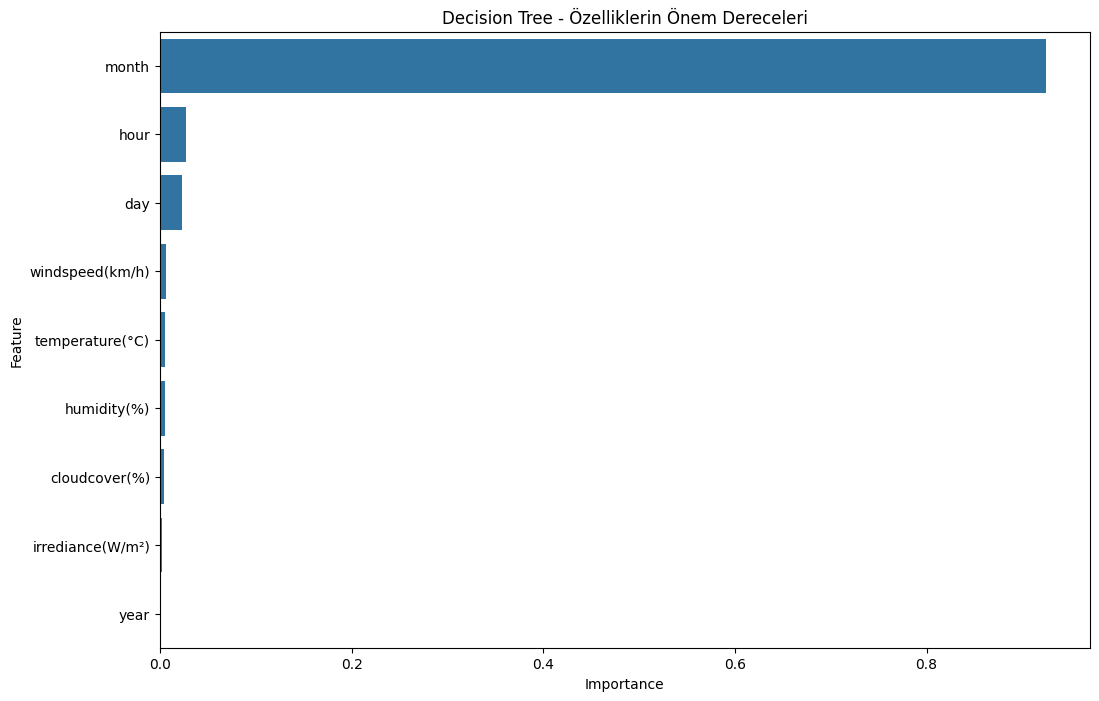

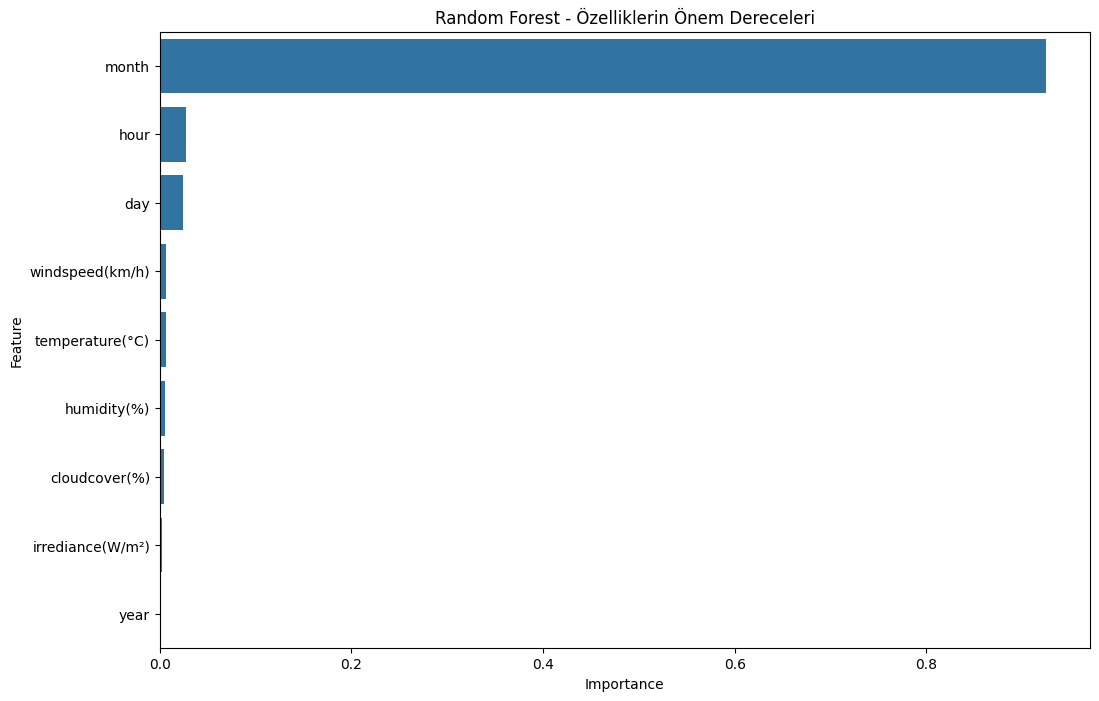

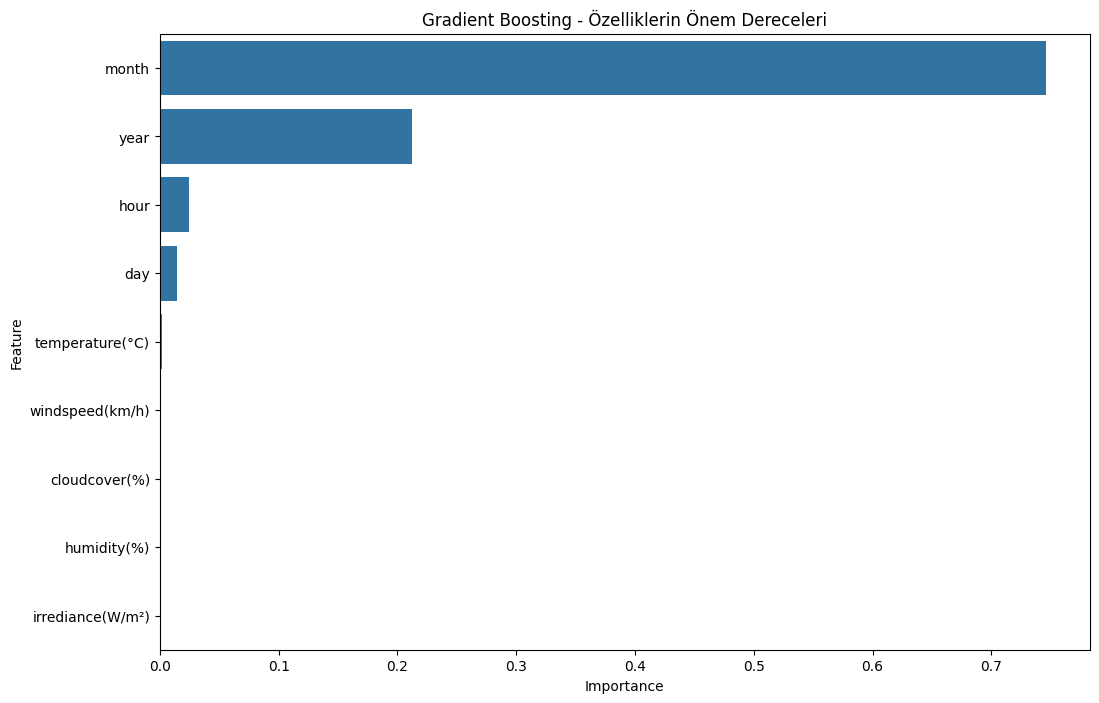

In [88]:
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_importances_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
        plt.title(f'{name} - Özelliklerin Önem Dereceleri')
        plt.show()